# Data Preprocessing
Dataset: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [9]:
df1 = df.copy()
df1.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [10]:
df1.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

There are no missing values in our dataframe, but there is a RestingBP that has minimum values of 0. 

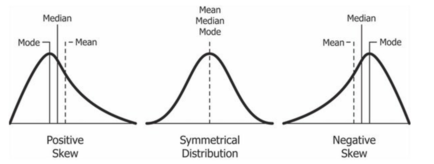

When data distribution is symmetrical, it is recommended to replace missing values with mean.

When data distribution is skewed, it is recommended to replace missing values with median or mode. The mean of skewed data will be greater or lower than the median.

In [11]:
print(df1["RestingBP"].mean())
print(df1["RestingBP"].median())

132.39651416122004
130.0


Therefore, in this case we will replace missing values with the median.

In [12]:
df1["RestingBP"] = df1["RestingBP"].fillna(df1["RestingBP"].mean())

Let's replace categorical features with quantitative ones, then convert the data to float64.

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in df1.select_dtypes(include='object').columns:
    df1[i] = le.fit_transform(df1[i])

df1 = df1.astype("float64")
df1.dtypes

Age               float64
Sex               float64
ChestPainType     float64
RestingBP         float64
Cholesterol       float64
FastingBS         float64
RestingECG        float64
MaxHR             float64
ExerciseAngina    float64
Oldpeak           float64
ST_Slope          float64
HeartDisease      float64
dtype: object

# Exploratory Data Analysis (EDA)

EDA refers to the critical process of performing initial investigations on data, so as to discover patterns, to spot anomalies, to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.